In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
the = pd.read_excel('Data/parameters_He_Ne (reformatted).xlsx', sheet_name=None)
exp = pd.read_excel('Data/exp_gauss3.xlsx', sheet_name=None)

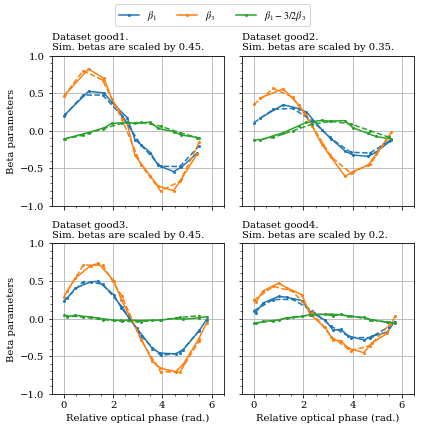

In [3]:
keys = ['beta1', 'beta3', 'beta1m3']
labels = {
    'beta1': r'$\beta_1$',
    'beta3': r'$\beta_3$',
    'beta1m3': r'$\beta_1-3/2\beta_3$',
}

plt.style.use('Report.mplstyle')
plt.figure(figsize=(6,6))
for i, (dataset, phi0, f) in enumerate([
            ['good1', 5.282, 0.45],
            ['good2', 5.101, 0.35],
            ['good3', 4.259, 0.45],
            ['good4', 3.393, 0.2],
        ]):
    plt.subplot(2, 2, i+1)
    plt.xlabel('Relative optical phase (rad.)')
    plt.ylabel('Beta parameters')
    plt.title(f"Dataset {dataset}.\nSim. betas are scaled by {f}.", loc='left')
    plt.gca().label_outer()

    df = exp[dataset]
    df['phase_adj'] = (df['phase']*2*np.pi - phi0) % (2*np.pi)
    df = df.set_index('phase_adj').sort_index()
    fitted = exp['fitted'].set_index('dataset').loc[dataset]
    th = df.index
    for k, prop in zip(keys, plt.rcParams['axes.prop_cycle']):
        plt.plot(th, df[f'he_{k}']-fitted[f'he_{k}_offset_value'], '.-', label=labels[k], **prop)

    df = the['He.0.0.9 w2w'].set_index(['dataset', 'phi (deg)']).loc[dataset]
    th = df.index/180*np.pi
    for k, prop in zip(keys, plt.rcParams['axes.prop_cycle']):
        plt.plot(th, f*df[k], '.--', label='', **prop)

    plt.grid(True)
    plt.xlim(-0.5, 6.5)
    plt.ylim(-1, 1)
    if i==0:
        plt.figlegend(loc='upper center', ncol=3)
plt.tight_layout()
plt.subplots_adjust(top=0.875)
plt.savefig(f"Figures/compare_he_with_ishikawa.pdf")
plt.show()